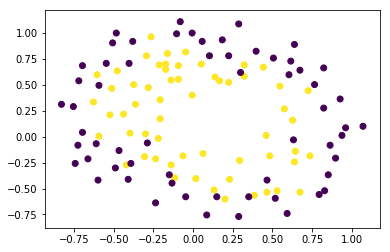

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

data = np.genfromtxt('LR-testSet2.txt', delimiter=',')
x_data = data[:,:-1]
y_data = data[:, -1]

plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()


In [10]:
# 分割数据
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# 创建决策树模型
# max_depth, 树的深度，
# min_samples_split 内部节点再划分所需要的最小样本数
model = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5)
model.fit(x_data, y_data)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

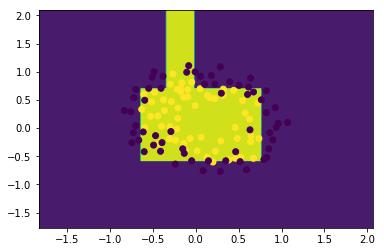

             precision    recall  f1-score   support

        0.0       0.73      0.97      0.84        34
        1.0       0.98      0.78      0.87        54

avg / total       0.88      0.85      0.85        88

             precision    recall  f1-score   support

        0.0       0.67      1.00      0.80        10
        1.0       1.00      0.75      0.86        20

avg / total       0.89      0.83      0.84        30



In [11]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() -1, x_data[:,0].max()+1
y_min, y_max = x_data[:, 1].min() -1, x_data[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# 等高线
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

predictions = model.predict(x_train)
print(classification_report(predictions, y_train))


predictions = model.predict(x_test)
print(classification_report(predictions, y_test))
